In [6]:
from sklearn.datasets import load_iris
import pandas as pd

# Step 2: Load the Iris dataset
iris = load_iris()

# Step 3: Convert to a pandas DataFrame for easy viewing
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Step 4: Display the first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


In [4]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [10]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
print(df['species'].unique())

[0 1 2]


In [5]:
x=df.drop('species', axis=1)
y=df['species']

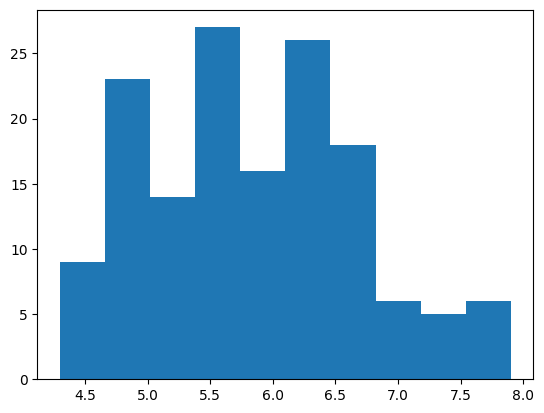

In [7]:
import matplotlib.pyplot as plt
iris=load_iris()
plt.hist(df['sepal length (cm)'])
plt.show()


In [9]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [10]:
print(df.columns.tolist())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('species', axis=1), df['species'], 
    test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [3]:
print(X_train, X_test, y_train, y_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                 4.6               3.6                1.0               0.2
15                 5.7               4.4                1.5               0.4
65                 6.7               3.1                4.4               1.4
11                 4.8               3.4                1.6               0.2
42                 4.4               3.2                1.3               0.2
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[120 rows x 4 columns]      sepal length (cm)  sepal width (cm)

<Figure size 800x600 with 0 Axes>

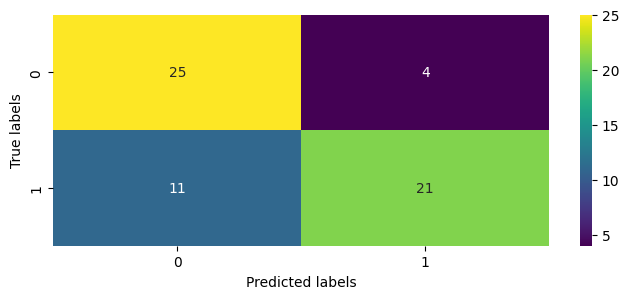

Accuracy: 0.7540983606557377

Confusion Matrix:
 [[25  4]
 [11 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [2]:
#Decision tree
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('heart.csv')

# 2. Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
plt.figure(figsize=(8,6))

# 6. Make predictions
y_pred = model.predict(X_test)
#plotting
plt.figure(figsize=(8,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
# 7. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))


In [6]:
#logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
# 1. Load the dataset
df = pd.read_csv('heart.csv')

# 2. Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#4 Feature Scaling
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# 5.Build the logistic regression 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))



Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Only features, not labels
feature_names = iris.feature_names

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)
df_standardized = pd.DataFrame(X_standardized, columns=feature_names)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
df_minmax = pd.DataFrame(X_minmax, columns=feature_names)

# Output examples
print("Original data (first 5 rows):")
print(df.head())

print("\nStandardized data (first 5 rows):")
print(df_standardized.head())

print("\nMin-Max Scaled data (first 5 rows):")
print(df_minmax.head())


Original data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Standardized data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

Min-Max Scaled data (f

In [8]:
# model training
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
sccaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_scaled,y)
y_pred_dt=dt.predict(X_scaled)
accuracy_dt=accuracy_score(y, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 1.0


In [11]:
#Evaluate the model
model= grid_search.best_estimator_
y_pred =model.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Parameters: {accuracy:.2f}")
                

Accuracy with Best Parameters: 1.00


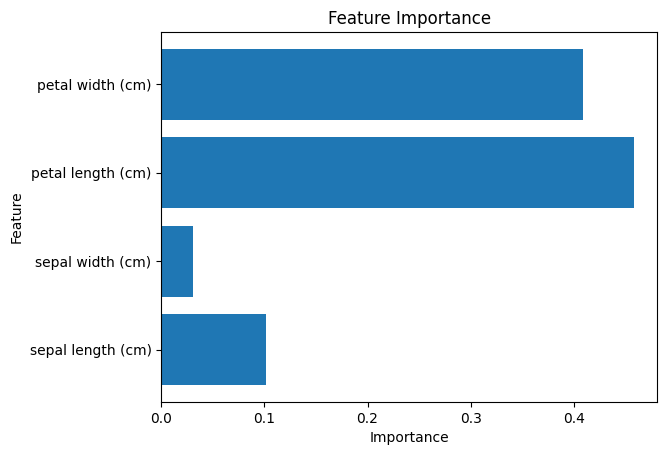

In [13]:
# Get feature importance
feature_importances = model.feature_importances_
feature_names = iris.feature_names

# Plot feature importance
import matplotlib.pyplot as plt
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()